## Logic Regression

In [288]:
# import data
import numpy as np
import pandas as pd
def upload_data(filename):
    file = open(filename)
    lineLst = []
    for line in file.readlines():
        lineMod = line.strip().split(',')
        tmp = []
        for l in lineMod:
            tmp.append(float(l))
        lineLst.append(tmp)
    data_DF = pd.DataFrame(lineLst, columns = ['X_1','X_2','Y']) #X.shape(100,),Y.shape(100,)
    return data_DF

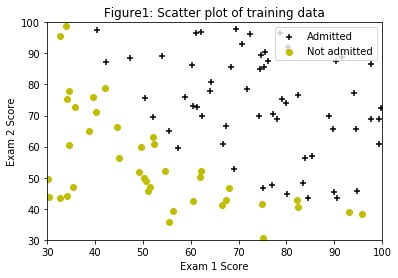

In [289]:
# visualize the data
from matplotlib import pyplot as plt
data = upload_data('/Users/mac/Desktop/MLcoursework/ex2-week3-logistic regression/ex2/ex2data1.txt')
data.insert(loc = 0, column = 'X_0', value = [1]*data.shape[0])
Y_positive = data[data['Y']==1]   # all data whose Y == 1
Y_negative = data[data['Y']==0]   # all data whose Y == 0
plt.scatter(Y_positive['X_1'], Y_positive['X_2'] ,marker = '+', color = 'black', label  ='Admitted')
plt.scatter(Y_negative['X_1'], Y_negative['X_2'] ,marker = 'o', color = 'y', label  ='Not admitted')
plt.xlim(30,100)
plt.ylim(30,100)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc = 'upper right')
plt.title('Figure1: Scatter plot of training data')
plt.show()

In [290]:
# compute H_Func
def H_Func(X, theta):     # in this project, theta.shape(1,3), X.shape(3,n_train)
    Z = np.dot(theta, X)  # Z.shape(1,n_train)
    sigmoid = 1/(1+np.exp(-Z))
    return sigmoid        # H_Func return an array with shape(1,n_train)
# compute costFunction and gradient function
import math
def costFunction(X_train,Y_train,theta):     # X_train.shape(3,n_train),Y_train.shape(1,n_train),theta.shape(1,3)
    n_train = X_train.shape[1]               # n_train is the number of training data
    total_cost = sum((-Y_train*np.log(H_Func(X_train, theta))-(1-Y_train)*np.log(1-H_Func(X_train, theta)))[0])
    J = total_cost / n_train
    gradient = (np.dot((H_Func(X_train, theta)-Y_train), X_train.T) / n_train)[0] #gradient.shape(1,3)
    return J, gradient

In [291]:
# check the cost of the training data with initial theta
X_train = np.array(data.iloc[:,:3]).T      # X_train.shape(3,100)
Y_train = np.array(data.iloc[:,3]).reshape(1,-1)     # Y_train.shape(1,100)

theta1 = np.zeros((1,3))                     # theta.shape(1,3)
J, grad = costFunction(X_train,Y_train,theta1)
print("when theta is [0,0,0], the expected cost is:", J)
print("when theta is [0,0,0], the expected gradients is:", grad)

theta2 = np.array([-24,0.2,0.2]).reshape(1,-1)
J, grad = costFunction(X_train,Y_train,theta2)
print("when theta is [0,0,0], the expected cost is:", J)
print("when theta is [0,0,0], the expected gradients is:", grad)

when theta is [0,0,0], the expected cost is: 0.69314718056
when theta is [0,0,0], the expected gradients is: [ -0.1        -12.00921659 -11.26284221]
when theta is [0,0,0], the expected cost is: 0.218330193827
when theta is [0,0,0], the expected gradients is: [ 0.04290299  2.56623412  2.64679737]


In [292]:
# optimize the parameter theta
# using the gradient descent algorithm
def gradient_descent(X_train, Y_train, theta, alpha = 0.001, iters = 8000000):
    n_train = X_train.shape[1]
    for i in range(iters):
        grad = np.dot((H_Func(X_train, theta) - Y_train), X_train.T) / n_train   # grad.shape(1,3)
        theta = theta - alpha * grad     # theta.shape(1,3)
    total_cost = sum((-Y_train*np.log(H_Func(X_train, theta))-(1-Y_train)*np.log(1-H_Func(X_train, theta)))[0])
    J = total_cost / n_train
    return J, theta

In [146]:
import time
t1 = time.time()
print("start time is:", t1)
J_opt,theta_opt = gradient_descent(X_train, Y_train, np.array([0,0,0]).reshape(1,-1))
print(J_opt, theta_opt)
t2 = time.time()
print("stop time is:",t2)
delta_t = t2 - t1
print("time cost is:", t2 - t1)

start time is: 1536697877.659924
0.203591527064 [[-24.37770318   0.19996434   0.19513033]]
stop time is: 1536697994.108735
time cost is: 116.44881105422974


In [164]:
print(theta[0][0], theta[0][1], theta[0][2])

-24.0 0.2 0.2


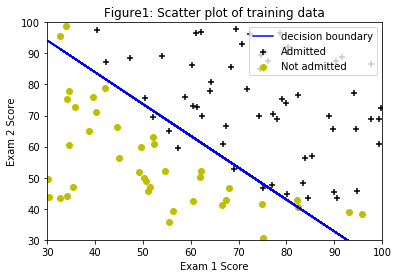

In [293]:
# visualize the decision boundary
# visualize the data
from matplotlib import pyplot as plt
data = upload_data('/Users/mac/Desktop/MLcoursework/ex2-week3-logistic regression/ex2/ex2data1.txt')
data.insert(loc = 0, column = 'X_0', value = [1]*data.shape[0])
Y_positive = data[data['Y']==1]   # all data whose Y == 1
Y_negative = data[data['Y']==0]   # all data whose Y == 0
plt.scatter(Y_positive['X_1'], Y_positive['X_2'] ,marker = '+', color = 'black', label  ='Admitted')
plt.scatter(Y_negative['X_1'], Y_negative['X_2'] ,marker = 'o', color = 'y', label  ='Not admitted')
plt.plot(data.loc[:,'X_1'], (theta_opt[0][0]+theta_opt[0][1]*data.loc[:,'X_1'])/(-theta_opt[0][2]), color = "blue", label = "decision boundary")
plt.xlim(30,100)
plt.ylim(30,100)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc = 'upper right')
plt.title('Figure1: Scatter plot of training data')
plt.show()

In [294]:
# predict the Y using the optimal theta
def predict(X_train, theta): # X_train.shape(3, n_train), theta.shape(1,3)
    p = H_Func(X_train, theta)
    n_train = X_train.shape[1]
    Y_predict = np.where(p>=0.5, 1, 0)
    return Y_predict

In [295]:
Y_predict = predict(X_train, theta_opt)

data.insert(loc = 4, column = 'Y_predict', value = Y_predict.tolist()[0])

accuracy = np.mean(data['Y']==data['Y_predict'])   # np.meam()the parameter is an array, and False equals to 0
print('under the optimal theta, the prediciton accuracy is:', accuracy)

under the optimal theta, the prediciton accuracy is: 0.89


# create a  class to include the whole logistic regression process

In [ ]:
class logistic_regre(object):
    

# test with iris data

In [188]:
data3 = iris.data[:,:2]
target = iris.target.reshape(-1,1)

In [228]:
DF = pd.DataFrame({'X_1':data3[:100,0].tolist(), 'X_2':data3[:100,1].tolist(), "Y": target.reshape(1,-1)[0].tolist()[:100]})

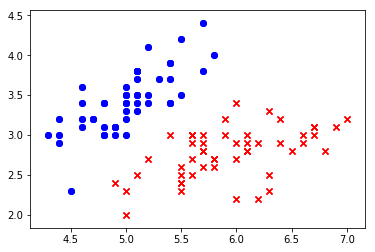

In [234]:
Y_positive = DF[DF['Y'] == 1]
Y_negative = DF[DF['Y'] == 0]
plt.scatter(Y_positive['X_1'], Y_positive['X_2'], color = 'red', marker = 'x')
plt.scatter(Y_negative['X_1'], Y_negative['X_2'], color = 'blue', marker = 'o')
plt.show()